In [1]:
from utils.cyclegan_func import create_cyclegan_model
from utils.utils import create_ds

In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
painting_ds, photo_ds = create_ds('George_W_Bush/','Qaajar_portrait_processed/')

OperatorNotAllowedInGraphError: in user code:

    /home/soheil/Soheil/lin-python/S/CycleGAN_old_persian_paintings/utils/utils.py:14 decode_image  *
        if min(img_w,img_h)>256:
    /home/soheil/.local/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:778 __bool__  **
        self._disallow_bool_casting()
    /home/soheil/.local/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:548 _disallow_bool_casting
        self._disallow_in_graph_mode("using a `tf.Tensor` as a Python `bool`")
    /home/soheil/.local/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:535 _disallow_in_graph_mode
        raise errors.OperatorNotAllowedInGraphError(

    OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.


In [3]:
min(2,5)

2

In [2]:


cycle_gan_model=create_cyclegan_model()
cycle_gan_model.fit(painting_ds, photo_ds,1)

58/58 [==============================] - 115s 2s/step - qpaintings_gen_loss: 9.1171 - photo_gen_loss: 9.3318 - qpaintings_disc_loss: 0.6392 - photo_disc_loss: 0.6309


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
# a=cycle_gan_model.give_model()
# immm=a(next(iter(photo_ds.take(1))), training=False)[0].numpy()
# immm = (immm * 127.5 + 127.5).astype(np.uint8)
# plt.imshow(immm)

In [25]:
painting_jpg_files = [path_p_+f_ for f_ in os.listdir(path_p_)]

In [58]:
for img in painting_jpg_files:
    image_string = tf.io.read_file(img)
    image = tf.image.decode_jpeg(image_string, channels=3).numpy()
    
    s_=int((np.min(image.shape[:2])-50)/2)
    try:
        image=image[0:2*s_,int(image.shape[1]/2)-s_:int(image.shape[1]/2)+s_,:]
        tf.keras.preprocessing.image.save_img('Qaajar_portrait_processed/'+img.split('/')[-1],image)
    except:
        pass

In [4]:
import tensorflow as tf


In [89]:
IMAGE_SIZE = [256, 256]
def decode_image(filename):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    if np.min(image.shape[:2])>256:
        s_=int((np.min(image.shape[:2])-20)/2)
        image=image[int(image.shape[0]/2)-s_:int(image.shape[0]/2)+s_,
                    int(image.shape[1]/2)-s_:int(image.shape[1]/2)+s_,:]
    image = tf.image.resize(image, IMAGE_SIZE, method='nearest')
    return image

In [93]:
ff=decode_image('Qaajar_portrait/011.jpg')

In [42]:
IMAGE_SIZE = [256, 256]
path_p_='Qaajar_portrait/'
    
def decode_image(filename):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
#     img_h = tf.shape(image)[0]
#     img_w = tf.shape(image)[1]
#     s_=int((min(img_w,img_h)-20)/2)
#     tf.image.crop_and_resize(image,boxes=[[0,0,1,1]],crop_size=(256,256),box_indices=[0])
#     if min(img_w,img_h)>256:
#         s_=int((min(img_w,img_h)-20)/2)
#         image=image[int(img_h/2)-s_:int(img_h/2)+s_,
#                     int(img_w/2)-s_:int(img_w/2)+s_,:]
    image = tf.image.resize(image, IMAGE_SIZE, method='nearest')
    return image

painting_jpg_files = [path_p_+f_ for f_ in os.listdir(path_p_)]
dataset_painting = tf.data.Dataset.from_tensor_slices(painting_jpg_files)
dataset_painting = dataset_painting.map(decode_image).batch(1)



In [43]:
tf.image.crop_and_resize(dataset_painting,boxes=[[0,0,1,1]],crop_size=(256,256),box_indices=[0])

ValueError: Attempt to convert a value (<BatchDataset shapes: (None, 256, 256, 3), types: tf.float32>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>) to a Tensor.

In [34]:
dataset_painting

<BatchDataset shapes: (None, 256, 256, 3), types: tf.float32>

In [11]:
decode_image('Qaajar_portrait/011.jpg')

Qaajar_portrait/011.jpg


<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 0.96862745,  1.        ,  1.        ],
        [ 0.96862745,  1.        ,  1.        ],
        [ 0.94509804,  1.        ,  1.        ],
        ...,
        [-0.6       , -0.20784312, -0.1372549 ],
        [-0.58431375, -0.20784312, -0.12941176],
        [-0.5686275 , -0.19215685, -0.11372548]],

       [[ 0.96862745,  1.        ,  1.        ],
        [ 0.9529412 ,  1.        ,  1.        ],
        [-0.4588235 , -0.3333333 , -0.3333333 ],
        ...,
        [-0.58431375, -0.19215685, -0.12156862],
        [-0.5764706 , -0.19999999, -0.12156862],
        [-0.5764706 , -0.19999999, -0.12156862]],

       [[ 0.9372549 ,  1.        ,  1.        ],
        [-0.4980392 , -0.35686272, -0.35686272],
        [-0.4823529 , -0.25490195, -0.2235294 ],
        ...,
        [-0.5686275 , -0.17647058, -0.10588235],
        [-0.5686275 , -0.19215685, -0.11372548],
        [-0.56078434, -0.18431371, -0.10588235]],

       ...,

     

In [74]:
image_string = tf.io.read_file('Qaajar_portrait/011.jpg')
image = tf.image.decode_jpeg(image_string, channels=3)
# image = (tf.cast(image, tf.float32) / 127.5) - 1

In [75]:
s_=int((np.min(image.shape[:2])-20)/2)

In [80]:
a=image[int(image.shape[0]/2)-s_:int(image.shape[0]/2)+s_,int(image.shape[1]/2)-s_:int(image.shape[1]/2)+s_,:]
a = tf.image.resize(a, [256, 256], method='nearest')

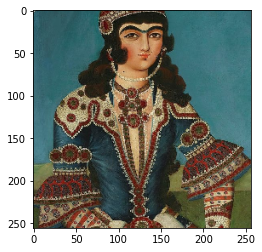

In [81]:
plt.imshow(a.numpy()[:,:,:])

In [16]:
immm = (immm * 127.5 + 127.5).astype(np.uint8)


In [3]:
import tensorflow as tf

In [15]:
IMAGE_SIZE = [256, 256]
image_string = tf.io.read_file('George_W_Bush/George_W_Bush_0288.jpg')
image = tf.image.decode_jpeg(image_string, channels=3)
# image = (tf.cast(image, tf.float32) / 127.5) - 1
image = tf.image.resize(image, IMAGE_SIZE, method='nearest')


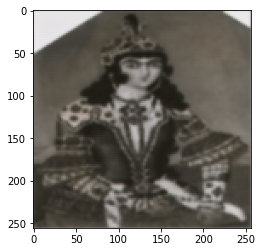

In [91]:
import os
['George_W_Bush/'+f_ for f_ in os.listdir('George_W_Bush/')]

['George_W_Bush/George_W_Bush_0288.jpg',
 'George_W_Bush/George_W_Bush_0172.jpg',
 'George_W_Bush/George_W_Bush_0512.jpg',
 'George_W_Bush/George_W_Bush_0227.jpg',
 'George_W_Bush/George_W_Bush_0269.jpg',
 'George_W_Bush/George_W_Bush_0123.jpg',
 'George_W_Bush/George_W_Bush_0007.jpg',
 'George_W_Bush/George_W_Bush_0267.jpg',
 'George_W_Bush/George_W_Bush_0175.jpg',
 'George_W_Bush/George_W_Bush_0090.jpg',
 'George_W_Bush/George_W_Bush_0307.jpg',
 'George_W_Bush/George_W_Bush_0521.jpg',
 'George_W_Bush/George_W_Bush_0351.jpg',
 'George_W_Bush/George_W_Bush_0517.jpg',
 'George_W_Bush/George_W_Bush_0499.jpg',
 'George_W_Bush/George_W_Bush_0214.jpg',
 'George_W_Bush/George_W_Bush_0221.jpg',
 'George_W_Bush/George_W_Bush_0304.jpg',
 'George_W_Bush/George_W_Bush_0492.jpg',
 'George_W_Bush/George_W_Bush_0386.jpg',
 'George_W_Bush/George_W_Bush_0427.jpg',
 'George_W_Bush/George_W_Bush_0298.jpg',
 'George_W_Bush/George_W_Bush_0305.jpg',
 'George_W_Bush/George_W_Bush_0330.jpg',
 'George_W_Bush/